# Catalysts

## Motivation

Catalysts are ubiquitous in chemistry and biology and affect the rate of reaction.  They do so by affecting the overall activation energy of the reaction.  This can be by directly affecting a particular activation barrier or by changing the mechanism of reaction.  In these notes we will see a few examples of how a catalyst affects chemical kinetics.

## Learning goals

After working through these notes, you will be able to:

1. Define a catalysts
2. Identidy a catalyst in a reaction mechanism
3. Describe, qualitatively, how a catalyst enhances rates
4. Derive the rate equation for a catalyzed reaction
5. Use the rate limiting step approximation to derive rate laws for mechanisms with slow steps

## Coding Concepts:

The following coding concepts are used in this notebook:

1. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Catalysts



Catalysts affect the overall rate of reaction, they do not affect the Thermodynamics of the reaction.  Catalysts do this by affecting the overall barrier height for a reaction by either reducing a barrier height directly or by altering the mechanism of reaction.  

A *catalyst* is a substance that participates in a chemical reaction but is not consumed or altered by the end of the reaction.  A catalysts can be modified during a reaction but it must be produced again, unaltered, by the end of the reaction.  

The fact that a catalyst must be unaltered during a chemical reaction indicates that the overall Thermodynamics of the reaction are also unaltered by the presence of the catalyst.  A catalyst will not make a non-spontaneous reaction become spontaneous.  It will not affect the relative populations of products and reactants present at equilibrium.  

### Catalysts in an Energy Diagram Picture

Catalysts reduce the barrier height for a chemical reaction but do not alter the relative energy of the reactants and products.  This can indicated on an energy diagram by a reduced barrier height connecting the reactants and products.

[Text(0, -0.1, ''),
 Text(0, 0.0, ''),
 Text(0, 0.1, ''),
 Text(0, 0.20000000000000004, ''),
 Text(0, 0.30000000000000004, ''),
 Text(0, 0.4, ''),
 Text(0, 0.5000000000000001, '')]

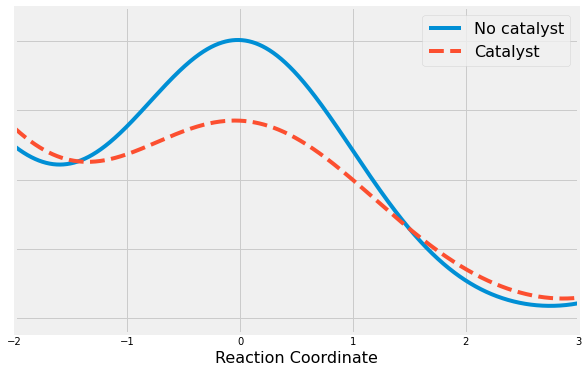

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
x_all = np.arange(-10, 10, 0.001) 
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
y1= norm.pdf(x_all,0,1)
y2 = norm.pdf(x_all,-3.2,1)
y3 = norm.pdf(x_all,5.5,1)
ax.plot(x_all,y1+y2+y3,label="No catalyst")
y1= norm.pdf(x_all,0,1.2)
ax.plot(x_all,0.85*y1+1.05*y2+y3,'--',label="Catalyst")
plt.legend(fontsize=16)
ax.set_xlim([-2,3])
ax.set_xlabel('Reaction Coordinate',fontsize=16)
ax.set_yticklabels([])

### Catalysts in a Mechanism

Catalysts show up in mechanisms first as a reactant and, later on, as a product.  This is as opposed to an intermediate that is first produced and then consumed during a mechanism.  

Consider the generic reaction 
\begin{equation}
A \longrightarrow B
\end{equation}

And proposed mechanism for this process of
\begin{eqnarray}
A &\overset{k_1}{\Rightarrow}& I \text{ (slow/rate determining)}\\
I &\overset{k_2}{\Rightarrow}& B
\end{eqnarray}

The rate law for this mechanism can be approximated by the rate determining step and thus we have that
\begin{equation}
v = k_1[A].
\end{equation}
Note that if you used a steady-state approximation you would get a similar looking rate law of 
\begin{equation}
v = k_1k_2[A].
\end{equation}

If a catalysts is introduced into the reaction this is sometimes denoted as under or over the reaction arrow as
\begin{equation}
A \overset{C}{\longrightarrow} B
\end{equation}

A catalysts, by definition, must modify the mechanism of the reaction.  Here, we might propose that
\begin{eqnarray}
A + C &\overset{k_{1,C}}{\Rightarrow}& AC \text{ (slow/rate determining)}\\
AC &\overset{k_{2,C}}{\Rightarrow}& B + C
\end{eqnarray}

Here we see that the rate law (using the rate limiting approximation) is
\begin{equation}
v_C = k_{1,C}[A][C]
\end{equation}

There are a few things to not from this expression.  First is that the rate now depends on the concentration of the catalysts.  This make sense.  If that catalyst is binding the reactant to facilitate the formation of the product, as proposed in this mechanism, the concentration of the catalysts should affect the rate.  Also, if the catalyst does lower the activation barrier of the reaction, we would expect $k_{1,C} > k_1$ and thus for $v_C > v$.

### Lindemann Mechanism for Unimolecular Reactions

One thing we have thus far overlooked is how unimolecular reactions actually occur.  A unimolecular step, such as an isomerization, might look like
\begin{equation}
CH_3NC(g) \overset{k}{\Rightarrow} CH_3CN(g)
\end{equation}
with corresponding rate law
\begin{equation}
\frac{d[CH_3NC]}{dt} = -k[CH_3NC]
\end{equation}

But where does the energy come from.  For a bimolecular (or higher molecularity) reaction, we can consider that only a fraction of collisions have enough kinetic energy to overcome the activation barrier.  In unimolecular reactions, there are no collisions so why do any (or not all) molecules isomerize?  

Lindemann proposed that unimolecular reactions actually occur after collision with another molecule/particle in the reaction vessel.  During that collision, the other molecule inparts kinetic energy to the $CH_3NC$ molecule ultimately providing it with enough energy to overcome the activation energy to isomerize.  Thus, Lindemann proposed that a unimolecular elementary step actually proceeds as a two step mechanism
\begin{eqnarray}
CH_3NC(g) + M(g) &\overset{k_1}{\underset{k_{-1}}{\overset{\Longrightarrow}{\Longleftarrow}}}& CH_3NC(g)^* + M(g)\\
CH_3NC(g)^* &\overset{k_2}{\Longrightarrow}& CH_3CN(g)
\end{eqnarray}
where $M$ is some other molecule in the reaction vessel (it could be a reactant, product, carrier gas, or anything else) and $CH_3NC(g)^*$ denotes the energized form of the molecule.  

Because $M$ is introduced as a reactant and not consumed during the reaction, it is a version of a catalyst.  It is a bit untraditional as a catalyst because it might be another reactant molecule but it can still be considered a catalyst.

The rate law stemming from this mechanism, and employing the steady-state approximation, is 
\begin{equation}
v(t) = \frac{k_1k_2[M]}{k_2 + k_{-1}[M]}[A]
\end{equation}

At high concentration we expect $k_{-1}[M][A^*] >> k_2[A^*]$ (because collision will be frequent) or $k_{-1}[M] >> k_2$ simplifying the rate expression to 
\begin{equation}
v(t) = \frac{k_1k_2}{k_{-1}}[A]
\end{equation}
which is first order in $[A]$ and first order overall.

At low concentration, we expect $k_{-1}[M][A^*] << k_2[A^*]$ (because collision will be infrequent) or $k_{-1}[M] << k_2$ simplifying the rate expression to 
\begin{equation}
v(t) = k_1[M][A]
\end{equation}
which is first order in $M$ and $A$ and second order overall.  This mechanism has been demonstrated to accurately capture the transition of the rate constant from first to second order as a function of concentration for reactions such as the isomerization of $CH_3CN$.